# <h1 align="center">Clustering Project</h1>
# <h1 align="center">Erfan Aliannezhadi</h1>

### Introduction
In this project, we cluster customers in different clusters


### Introduction of data set features
* **CustomerID**
* **Gender**
* **Age**
* **Annual Income**
* **Spending Score**

<p>First, we do the necessary imports</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
from scipy.cluster import hierarchy
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering


Then we study our dataset

In [28]:
df = pd.read_csv('customer.csv', dtype={'Gender': 'category'})
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


First, we convert the gender column into numerical values

In [29]:
df['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

In [30]:
def gender_transformation(gender):
    if gender == 'Male': return 1
    if gender == 'Female': return 0


df['Gender'] = df['Gender'].apply(gender_transformation).astype('int64')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


and we drop Customer Id because it has no effect on clustering

In [31]:
df = df.drop('CustomerID', axis=1)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [32]:
df.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.440000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,0.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


### Visualizing data

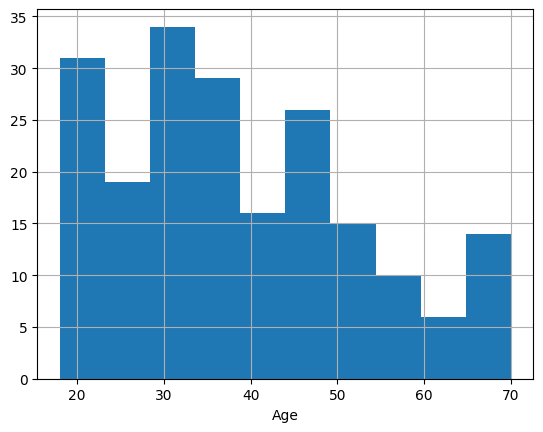

In [11]:
df['Age'].hist()
plt.xlabel('Age')
plt.show()

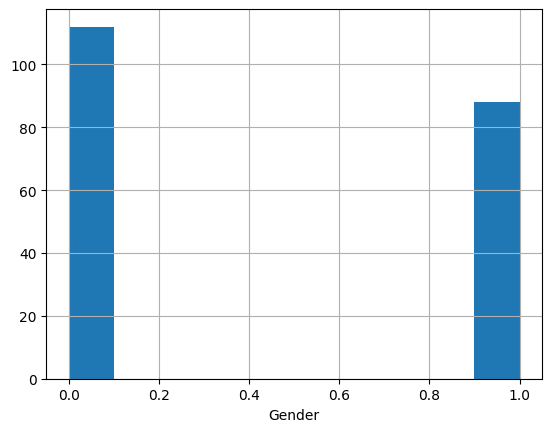

In [12]:
df['Gender'].hist()
plt.xlabel('Gender')
plt.show()

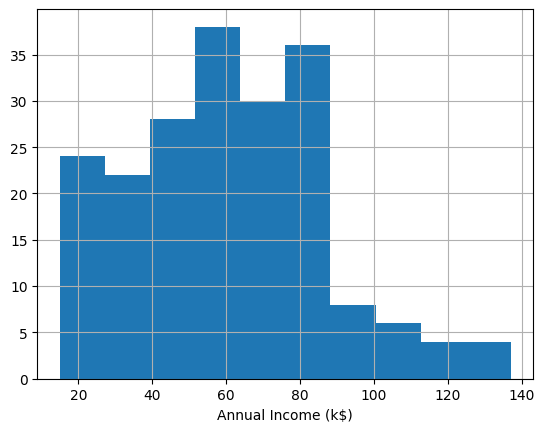

In [13]:
df['Annual Income (k$)'].hist()
plt.xlabel('Annual Income (k$)')
plt.show()

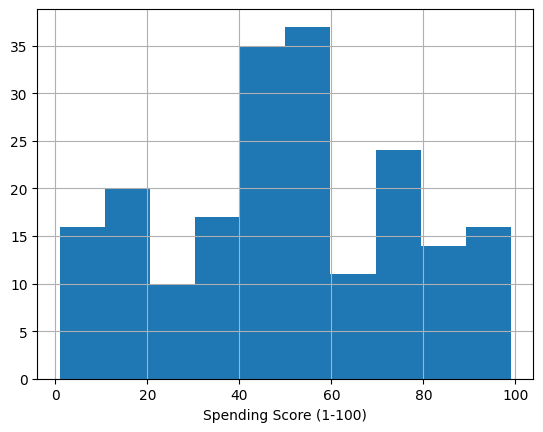

In [14]:
df['Spending Score (1-100)'].hist()
plt.xlabel('Spending Score (1-100)')
plt.show()

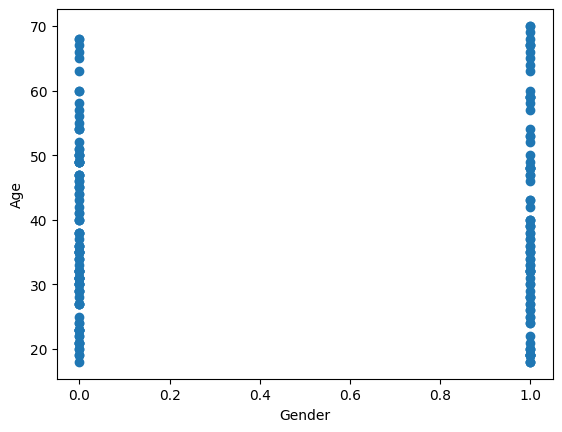

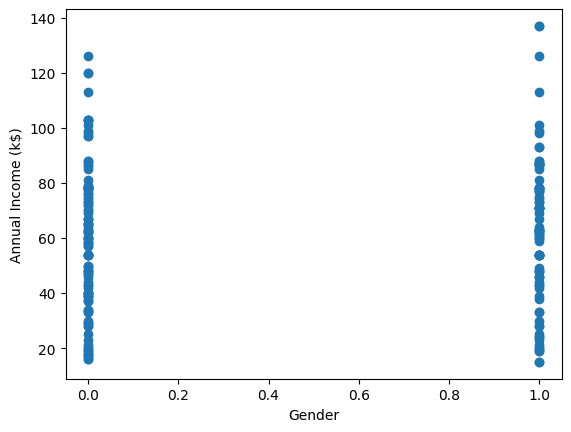

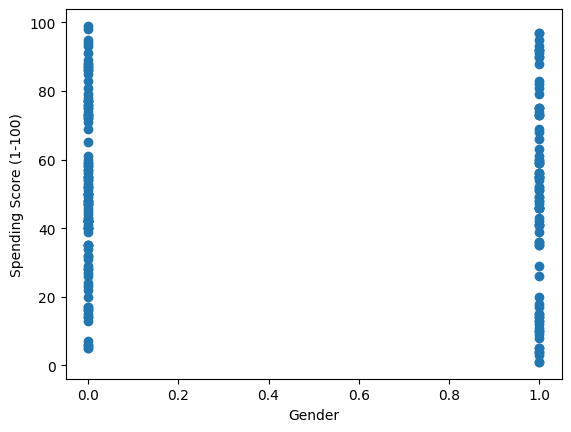

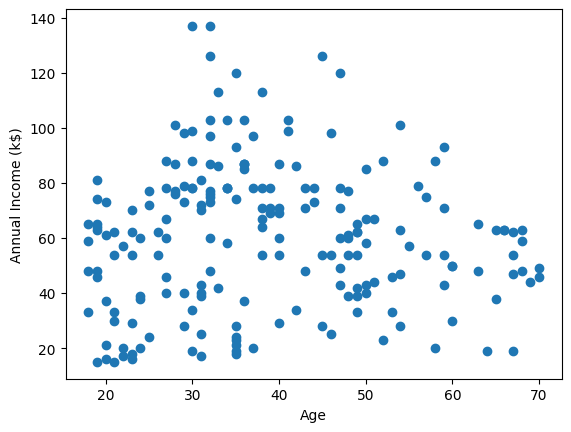

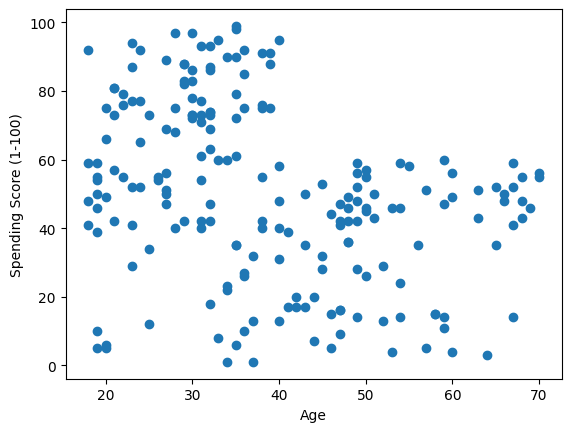

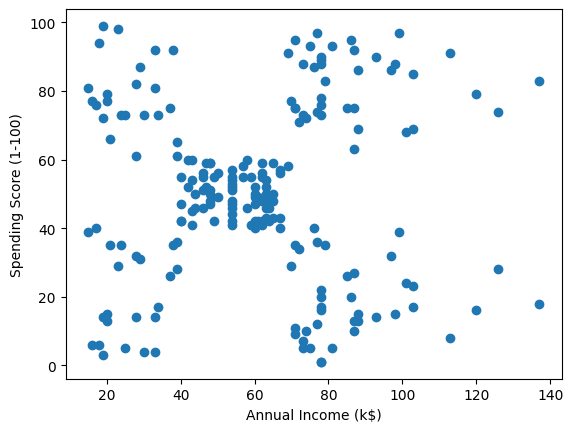

In [34]:
columns = df.columns
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        column1 = columns[i]
        column2 = columns[j]
        plt.scatter(df[column1], df[column2])
        plt.xlabel(column1)
        plt.ylabel(column2)
        plt.show()

C:\Users\Erfan Aliannezhadi\AppData\Local\Temp\ipykernel_11816\1018719099.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


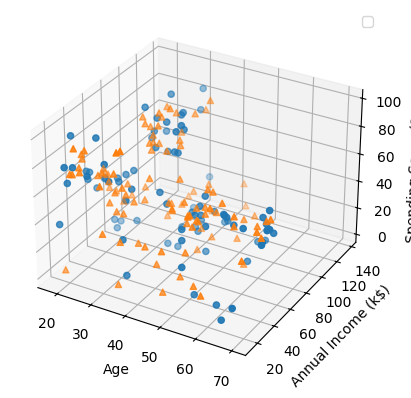

In [16]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
male_df = df[df['Gender'] == 1]
female_df = df[df['Gender'] == 0]
ax.scatter(male_df['Age'], male_df['Annual Income (k$)'], male_df['Spending Score (1-100)'], marker='o')
ax.scatter(female_df['Age'], female_df['Annual Income (k$)'], female_df['Spending Score (1-100)'], marker='^')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.show()

In [39]:
X = df[['Age', 'Gender', 'Annual Income (k$)', 'Spending Score (1-100)']].values
X = StandardScaler().fit_transform(X)
X

array([[-1.42456879,  1.12815215, -1.73899919, -0.43480148],
       [-1.28103541,  1.12815215, -1.73899919,  1.19570407],
       [-1.3528021 , -0.88640526, -1.70082976, -1.71591298],
       [-1.13750203, -0.88640526, -1.70082976,  1.04041783],
       [-0.56336851, -0.88640526, -1.66266033, -0.39597992],
       [-1.20926872, -0.88640526, -1.66266033,  1.00159627],
       [-0.27630176, -0.88640526, -1.62449091, -1.71591298],
       [-1.13750203, -0.88640526, -1.62449091,  1.70038436],
       [ 1.80493225,  1.12815215, -1.58632148, -1.83237767],
       [-0.6351352 , -0.88640526, -1.58632148,  0.84631002],
       [ 2.02023231,  1.12815215, -1.58632148, -1.4053405 ],
       [-0.27630176, -0.88640526, -1.58632148,  1.89449216],
       [ 1.37433211, -0.88640526, -1.54815205, -1.36651894],
       [-1.06573534, -0.88640526, -1.54815205,  1.04041783],
       [-0.13276838,  1.12815215, -1.54815205, -1.44416206],
       [-1.20926872,  1.12815215, -1.54815205,  1.11806095],
       [-0.27630176, -0.

### K Means

Elbow Method Figure

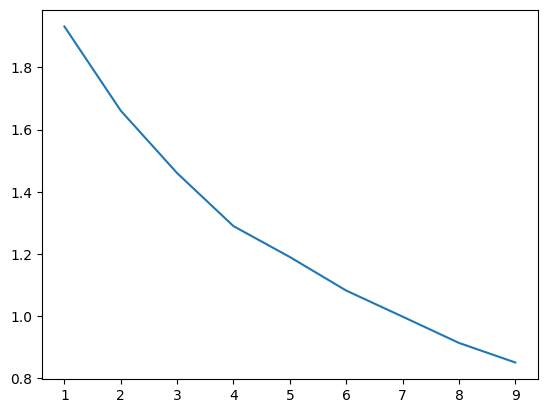

In [40]:
av_dis = []
for k in range(1, 10):
    k_means = KMeans(init="k-means++", n_clusters=k, n_init=50)
    k_means.fit(X)
    labels = k_means.labels_
    centers = k_means.cluster_centers_
    distances = np.linalg.norm(X - centers[labels], axis=1)
    average_distance = np.mean(distances)
    av_dis.append(average_distance)

plt.plot(range(1, 10), av_dis)
plt.show()


we choose k = 5

In [60]:
k_means = KMeans(init="k-means++", n_clusters=5, n_init=100)
k_means.fit(X)
labels = k_means.labels_
labels

array([1, 1, 0, 3, 0, 3, 0, 3, 4, 3, 4, 3, 0, 3, 4, 1, 0, 1, 4, 3, 4, 1,
       0, 1, 0, 1, 0, 1, 0, 3, 4, 3, 4, 1, 0, 3, 0, 3, 0, 3, 0, 1, 4, 3,
       0, 3, 0, 3, 3, 3, 0, 1, 3, 4, 0, 4, 0, 4, 3, 4, 4, 1, 0, 0, 4, 1,
       0, 0, 1, 3, 4, 0, 0, 0, 4, 1, 0, 4, 3, 0, 4, 1, 4, 0, 3, 4, 0, 3,
       3, 0, 0, 1, 4, 0, 3, 1, 0, 3, 4, 1, 3, 0, 4, 1, 4, 3, 0, 4, 4, 4,
       4, 3, 0, 1, 3, 3, 0, 0, 0, 0, 1, 0, 3, 1, 3, 3, 4, 1, 4, 1, 2, 1,
       3, 3, 2, 3, 2, 1, 2, 3, 0, 1, 3, 3, 2, 1, 4, 3, 2, 1, 2, 1, 2, 3,
       2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 1, 2, 1, 2, 3,
       2, 1, 2, 1, 2, 3, 2, 3, 2, 1, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1,
       2, 1], dtype=int32)

In [61]:
centers = k_means.cluster_centers_
centers

array([[ 0.7517978 , -0.88640526, -0.51757746, -0.4420241 ],
       [-0.76072691,  1.12815215,  0.05496398,  0.83369302],
       [ 0.0729628 ,  0.25517727,  1.14279271, -1.32381522],
       [-0.75047453, -0.88640526, -0.00501655,  0.6979562 ],
       [ 1.22385356,  1.12815215, -0.4498575 , -0.44231533]])

In [62]:
df['cluster'] = labels
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,19,15,39,1
1,1,21,15,81,1
2,0,20,16,6,0
3,0,23,16,77,3
4,0,31,17,40,0
...,...,...,...,...,...
195,0,35,120,79,3
196,0,45,126,28,2
197,1,32,126,74,1
198,1,32,137,18,2


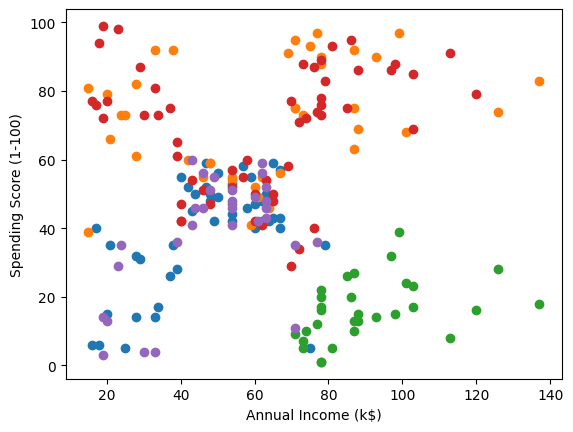

In [69]:
for i in range(5):
    temp_df = df[df['cluster'] == i]
    plt.scatter(temp_df['Annual Income (k$)'], temp_df['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

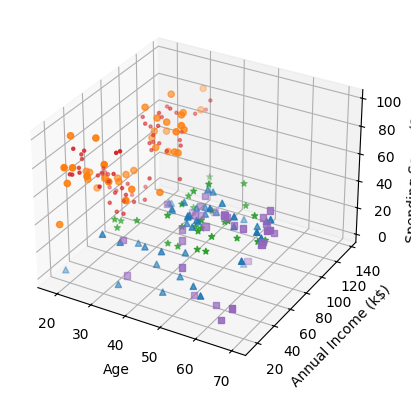

In [63]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
markers = ['^', 'o', '*', '.', 's']
for k in range(5):
    s = df[df['cluster'] == k]
    ax.scatter(s['Age'], s['Annual Income (k$)'], s['Spending Score (1-100)'], marker=markers[k])

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.show()

In [71]:
df.groupby('cluster').mean()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
cluster,,,,
0,0.000000,49.325581,47.000000,38.813953
1,1.000000,28.250000,62.000000,71.675000
2,0.566667,39.866667,90.500000,16.100000
3,0.000000,28.392857,60.428571,68.178571
4,1.000000,55.903226,48.774194,38.806452


### Hierarchical Clustering

In [61]:
dist_matrix = distance_matrix(X, X)
dist_matrix

array([[0.        , 1.63681098, 2.38878538, ..., 4.54611614, 4.81867651,
        5.02250496],
       [1.63681098, 0.        , 3.54154808, ..., 4.3182849 , 5.31878915,
        4.70189264],
       [2.38878538, 3.54154808, 0.        , ..., 5.42195122, 5.13299938,
        5.90251765],
       ...,
       [4.54611614, 4.3182849 , 5.42195122, ..., 0.        , 2.21418015,
        0.5647686 ],
       [4.81867651, 5.31878915, 5.13299938, ..., 2.21418015, 0.        ,
        2.5274803 ],
       [5.02250496, 4.70189264, 5.90251765, ..., 0.5647686 , 2.5274803 ,
        0.        ]])

C:\Users\Erfan Aliannezhadi\AppData\Local\Temp\ipykernel_10404\1476920044.py:1: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix, 'average')


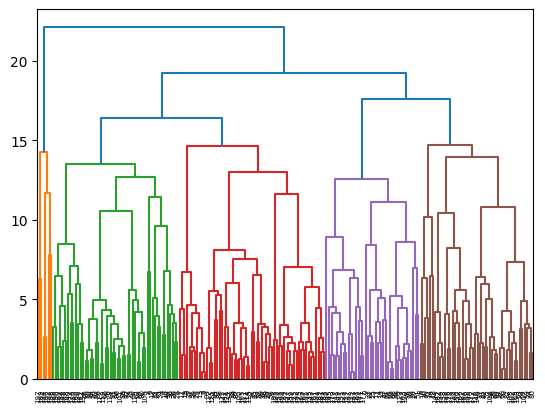

In [75]:
Z = hierarchy.linkage(dist_matrix, 'average')
dendro = hierarchy.dendrogram(Z)

In [80]:
agglom = AgglomerativeClustering(n_clusters=5, linkage='average')
agglom.fit(X)
labels = agglom.labels_
labels

array([0, 0, 2, 1, 2, 1, 2, 1, 4, 1, 4, 1, 2, 1, 0, 0, 2, 0, 4, 1, 0, 0,
       2, 0, 2, 0, 2, 0, 2, 1, 4, 1, 4, 0, 2, 1, 2, 1, 2, 1, 2, 0, 4, 1,
       2, 1, 2, 1, 1, 1, 2, 0, 1, 4, 2, 4, 2, 4, 1, 4, 4, 0, 2, 2, 4, 0,
       2, 2, 0, 1, 4, 2, 2, 2, 4, 0, 2, 4, 1, 2, 4, 4, 4, 2, 1, 4, 2, 1,
       2, 2, 2, 0, 4, 2, 2, 0, 2, 1, 4, 0, 1, 2, 4, 0, 4, 1, 2, 4, 4, 4,
       4, 1, 2, 0, 1, 1, 2, 2, 2, 2, 0, 2, 2, 0, 1, 1, 3, 0, 3, 0, 3, 0,
       1, 1, 3, 1, 2, 0, 3, 1, 2, 0, 1, 1, 3, 0, 3, 1, 2, 0, 3, 0, 2, 1,
       2, 1, 3, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1, 2, 0, 3, 0, 3, 0, 2, 1,
       3, 0, 3, 0, 2, 1, 3, 1, 2, 0, 2, 0, 2, 1, 2, 1, 3, 1, 2, 1, 2, 0,
       3, 0])

In [81]:
df['cluster'] = labels
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,19,15,39,0
1,1,21,15,81,0
2,0,20,16,6,2
3,0,23,16,77,1
4,0,31,17,40,2
...,...,...,...,...,...
195,0,35,120,79,1
196,0,45,126,28,2
197,1,32,126,74,0
198,1,32,137,18,3


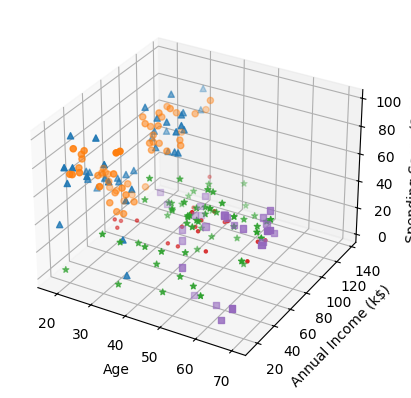

In [87]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
markers = ['^', 'o', '*', '.', 's']
for k in range(5):
    s = df[df['cluster'] == k]
    ax.scatter(s['Age'], s['Annual Income (k$)'], s['Spending Score (1-100)'], marker=markers[k])

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.show()

In [88]:
df.groupby('cluster').mean()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
cluster,,,,
0,1.0,28.390244,60.243902,69.756098
1,0.0,28.000000,60.320755,69.018868
2,0.0,47.169492,58.288136,35.813559
3,1.0,39.500000,85.150000,14.050000
4,1.0,57.370370,48.259259,41.777778


### DBSCN

In [112]:
epsilon = 0.7
minimumSamples = 7
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)
labels = db.labels_
labels

array([-1, -1, -1,  0, -1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1, -1, -1,
       -1, -1, -1, -1, -1,  1, -1, -1, -1,  1, -1,  1,  0, -1,  0, -1, -1,
        1,  0,  1,  0,  1,  0,  0, -1,  2,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  2,  0,  2,  0,  2,  0,  2,  2,  3,  0,  0,  2,  3,  0,  0,
        3,  0,  2,  0,  0,  0,  2,  3,  0,  2,  0,  0,  2, -1,  2,  0,  0,
        2,  0,  0,  0,  0,  0,  3,  2,  0,  0,  3,  0,  0,  2,  3,  0,  0,
        2,  3,  2,  0,  0,  2,  2,  2,  2,  0,  0,  3,  0,  0,  0,  0,  0,
        0,  3,  0,  0,  4,  0,  5,  2,  4, -1,  4, -1,  4,  0,  5, -1,  5,
       -1, -1, -1,  5, -1,  4,  0,  5, -1,  4,  2,  5, -1,  4, -1,  4, -1,
        5, -1,  5, -1,  5, -1,  5,  0,  5, -1,  5, -1,  5, -1,  5, -1, -1,
       -1, -1, -1,  4, -1,  5, -1, -1, -1,  4, -1,  5, -1,  5, -1,  4, -1,
       -1, -1,  5, -1,  5, -1, -1, -1, -1, -1, -1, -1, -1])

In [113]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

6

In [114]:
df['cluster'] = labels
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,19,15,39,-1
1,1,21,15,81,-1
2,0,20,16,6,-1
3,0,23,16,77,0
4,0,31,17,40,-1
...,...,...,...,...,...
195,0,35,120,79,-1
196,0,45,126,28,-1
197,1,32,126,74,-1
198,1,32,137,18,-1


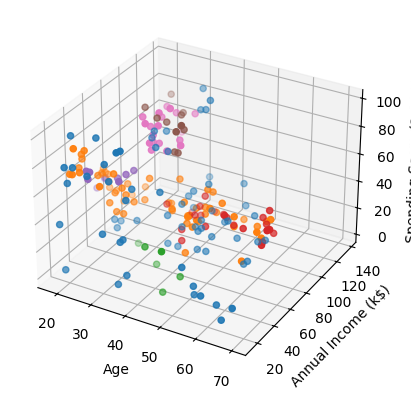

In [116]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for k in range(-1, n_clusters_):
    s = df[df['cluster'] == k]
    ax.scatter(s['Age'], s['Annual Income (k$)'], s['Spending Score (1-100)'])

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.show()

In [117]:
df.groupby('cluster').mean()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
cluster,,,,
-1,0.647059,37.941176,65.676471,35.911765
0,0.000000,38.365079,50.396825,52.841270
1,0.000000,43.000000,31.000000,20.833333
2,1.000000,56.782609,55.347826,47.391304
3,1.000000,21.600000,56.900000,52.600000
4,1.000000,35.454545,79.000000,89.363636
5,0.000000,31.736842,82.842105,81.315789
